In [357]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "banana"

# Import

In [358]:
library(ggplot2)
library(corrplot)
library(ggcorrplot)
library(dplyr)
library(psych)

# **1. Data Import & Data Structure**

In [359]:
data <-read.csv('/kaggle/input/banana/banana_quality.csv',header=T)

* **Size - size of fruit**
* **Weight - weight of fruit**
* **Sweetness - sweetness of fruit**
* **Softness - softness of fruit**
* **HarvestTime - amount of time passed from harvesting of the fruit**
* **Ripeness - ripness of fruit**
* **Acidity - acidity of fruit**
* **Quality - quality of fruit**

In [360]:
str(data)

'data.frame':	8000 obs. of  8 variables:
 $ Size       : num  -1.925 -2.41 -0.358 -0.869 0.652 ...
 $ Weight     : num  0.468 0.487 1.483 1.566 1.319 ...
 $ Sweetness  : num  3.0778 0.3469 1.5685 1.8896 -0.0225 ...
 $ Softness   : num  -1.47 -2.5 -2.65 -1.27 -1.21 ...
 $ HarvestTime: num  0.295 -0.892 -0.647 -1.006 -1.431 ...
 $ Ripeness   : num  2.44 2.07 3.09 1.87 1.08 ...
 $ Acidity    : num  0.271 0.307 1.427 0.478 2.812 ...
 $ Quality    : chr  "Good" "Good" "Good" "Good" ...


In [361]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Size,1,8000,-0.74780180,2.1360228,-0.89751402,-0.80975341,2.155923,-7.998074,7.970800,15.96887,0.266637460,-0.16215381,0.023881461
Weight,2,8000,-0.76101938,2.0159343,-0.86865897,-0.76764474,2.222462,-8.283002,5.679692,13.96269,0.044488539,-0.52766953,0.022538830
Sweetness,3,8000,-0.77022410,1.9484549,-1.02067310,-0.89501366,1.750799,-6.434022,7.539374,13.97340,0.614082534,0.38910512,0.021784388
Softness,4,8000,-0.01444088,2.0652159,0.20264395,0.03354469,2.258721,-6.959320,8.241555,15.20087,-0.192908863,-0.39316574,0.023089816
HarvestTime,5,8000,-0.75128830,1.9966608,-0.93419198,-0.81461344,1.925715,-7.570008,6.293280,13.86329,0.278147236,-0.08200214,0.022323346
Ripeness,6,8000,0.78109836,2.1142894,0.96495169,0.85263532,2.083866,-7.423155,7.249034,14.67219,-0.312077263,-0.08916331,0.023638474
Acidity,7,8000,0.00872508,2.2934666,0.09873514,0.04355403,2.453466,-8.226977,7.411633,15.63861,-0.152973706,-0.30700444,0.025641737
Quality*,8,8000,1.50075000,0.5000307,2.00000000,1.50093750,0.000000,1.000000,2.000000,1.00000,-0.002999441,-2.00024099,0.005590513


In [362]:
head(data)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-1.9249682,0.4680781,3.07783250,-1.472177,0.2947986,2.435570,0.2712903,Good
2,-2.4097514,0.4868699,0.34692144,-2.495099,-0.8922133,2.067549,0.3073251,Good
3,-0.3576066,1.4831762,1.56845220,-2.645145,-0.6472673,3.090643,1.4273220,Good
4,-0.8685235,1.5662014,1.88960490,-1.273761,-1.0062776,1.873001,0.4778617,Good
5,0.6518253,1.3191992,-0.02245899,-1.209709,-1.4306920,1.078345,2.8124418,Good
6,-2.8077223,1.1381357,3.44762680,-1.713302,-2.2209115,2.079410,2.2812028,Good


**Missing Value Check**

In [363]:
colSums(is.na(data))
data <- na.omit(data)

Size      Weight   Sweetness    Softness HarvestTime    Ripeness 
          0           0           0           0           0           0 
    Acidity     Quality 
          0           0

In [364]:
summary(data)

      Size             Weight          Sweetness          Softness       
 Min.   :-7.9981   Min.   :-8.2830   Min.   :-6.4340   Min.   :-6.95932  
 1st Qu.:-2.2777   1st Qu.:-2.2236   1st Qu.:-2.1073   1st Qu.:-1.59046  
 Median :-0.8975   Median :-0.8687   Median :-1.0207   Median : 0.20264  
 Mean   :-0.7478   Mean   :-0.7610   Mean   :-0.7702   Mean   :-0.01444  
 3rd Qu.: 0.6542   3rd Qu.: 0.7755   3rd Qu.: 0.3110   3rd Qu.: 1.54712  
 Max.   : 7.9708   Max.   : 5.6797   Max.   : 7.5394   Max.   : 8.24155  
  HarvestTime         Ripeness          Acidity            Quality         
 Min.   :-7.5700   Min.   :-7.4232   Min.   :-8.226977   Length:8000       
 1st Qu.:-2.1207   1st Qu.:-0.5742   1st Qu.:-1.629450   Class :character  
 Median :-0.9342   Median : 0.9650   Median : 0.098735   Mode  :character  
 Mean   :-0.7513   Mean   : 0.7811   Mean   : 0.008725                     
 3rd Qu.: 0.5073   3rd Qu.: 2.2616   3rd Qu.: 1.682063                     
 Max.   : 6.2933   Max.   

# **2. DataTransform**

In [365]:
cols <- c('Size','Weight','Sweetness','Softness','HarvestTime','Ripeness','Acidity')

**Data preprocessing**

In [366]:
for (i in cols){
    data[,i] <- round(data[,i],2)
    }

In [367]:
data_v <- data # Data for Visualization 

In [368]:
data$Quality <- ifelse(data$Quality == 'Good' , '1' , 
                      ifelse(data$Quality == 'Bad','2' ,'Na'))

data$Quality <- as.factor(data$Quality)

**Check Data**

In [369]:
head(data)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.92,0.47,3.08,-1.47,0.29,2.44,0.27,1
2,-2.41,0.49,0.35,-2.50,-0.89,2.07,0.31,1
3,-0.36,1.48,1.57,-2.65,-0.65,3.09,1.43,1
4,-0.87,1.57,1.89,-1.27,-1.01,1.87,0.48,1
5,0.65,1.32,-0.02,-1.21,-1.43,1.08,2.81,1
6,-2.81,1.14,3.45,-1.71,-2.22,2.08,2.28,1


In [370]:
summary(data)

      Size             Weight         Sweetness          Softness       
 Min.   :-8.0000   Min.   :-8.280   Min.   :-6.4300   Min.   :-6.96000  
 1st Qu.:-2.2800   1st Qu.:-2.223   1st Qu.:-2.1100   1st Qu.:-1.59000  
 Median :-0.9000   Median :-0.870   Median :-1.0200   Median : 0.20000  
 Mean   :-0.7478   Mean   :-0.761   Mean   :-0.7702   Mean   :-0.01449  
 3rd Qu.: 0.6525   3rd Qu.: 0.780   3rd Qu.: 0.3100   3rd Qu.: 1.55000  
 Max.   : 7.9700   Max.   : 5.680   Max.   : 7.5400   Max.   : 8.24000  
  HarvestTime         Ripeness          Acidity          Quality 
 Min.   :-7.5700   Min.   :-7.4200   Min.   :-8.230000   1:4006  
 1st Qu.:-2.1200   1st Qu.:-0.5700   1st Qu.:-1.630000   2:3994  
 Median :-0.9300   Median : 0.9650   Median : 0.100000           
 Mean   :-0.7512   Mean   : 0.7811   Mean   : 0.008751           
 3rd Qu.: 0.5100   3rd Qu.: 2.2600   3rd Qu.: 1.680000           
 Max.   : 6.2900   Max.   : 7.2500   Max.   : 7.410000           

# **3. Data Visualization**

**Histogram**

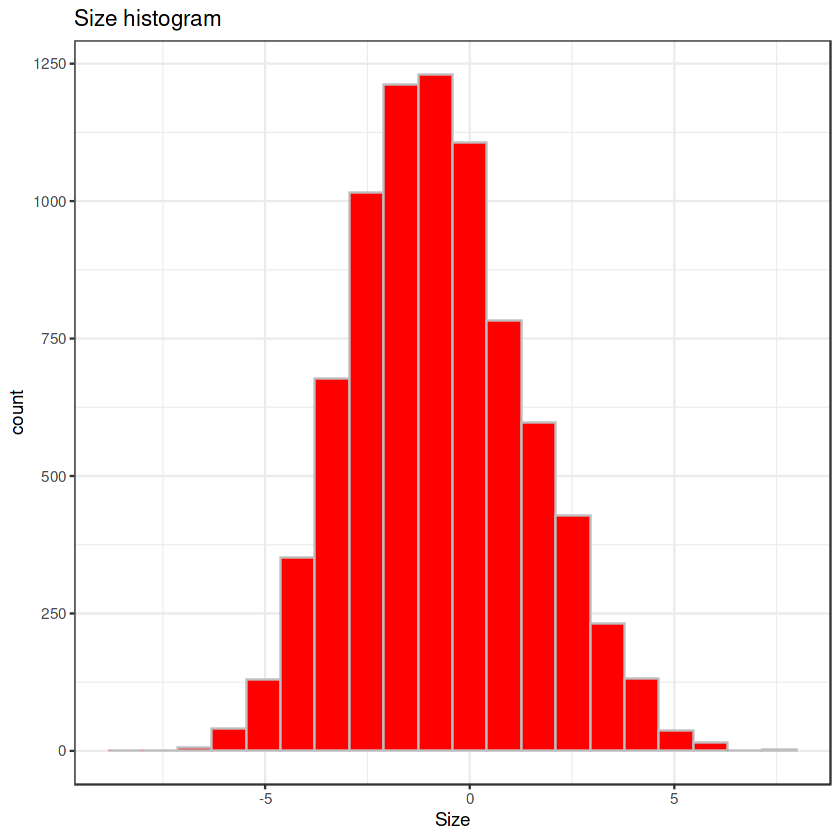

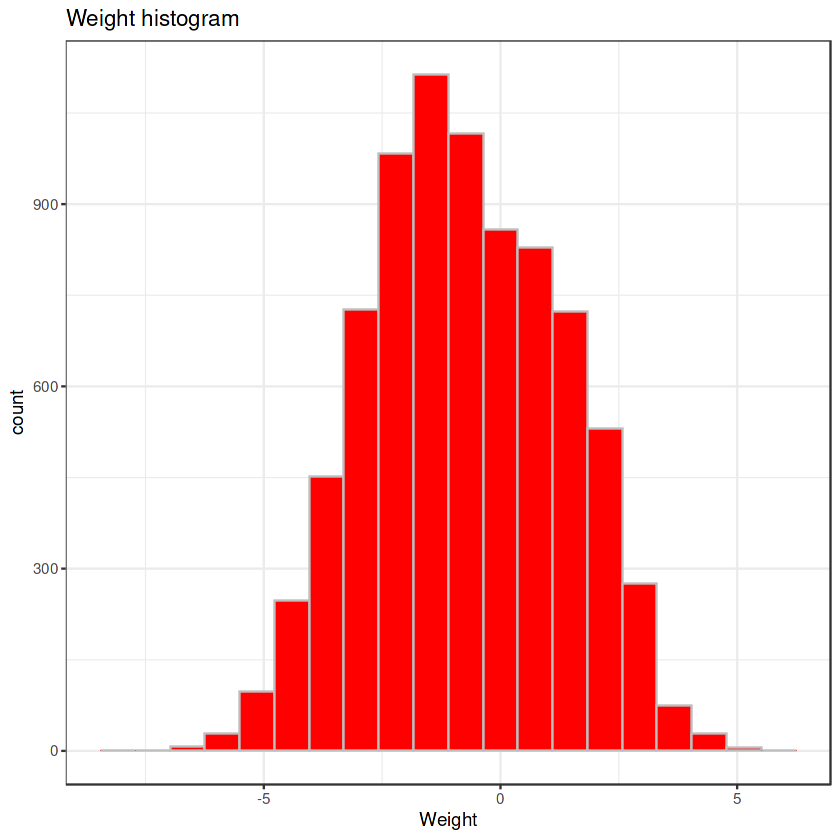

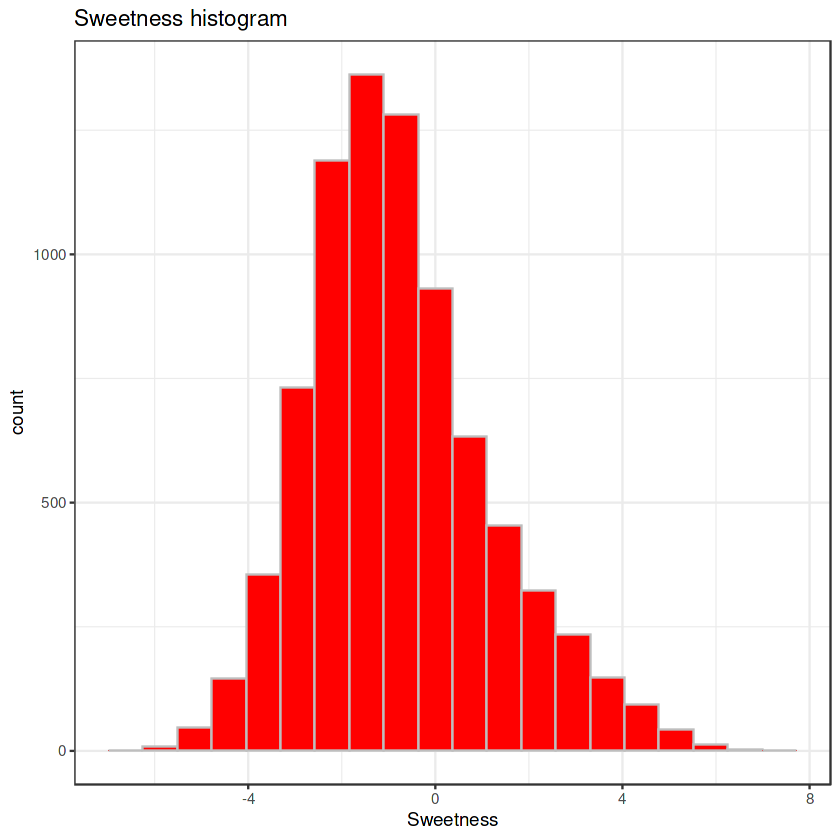

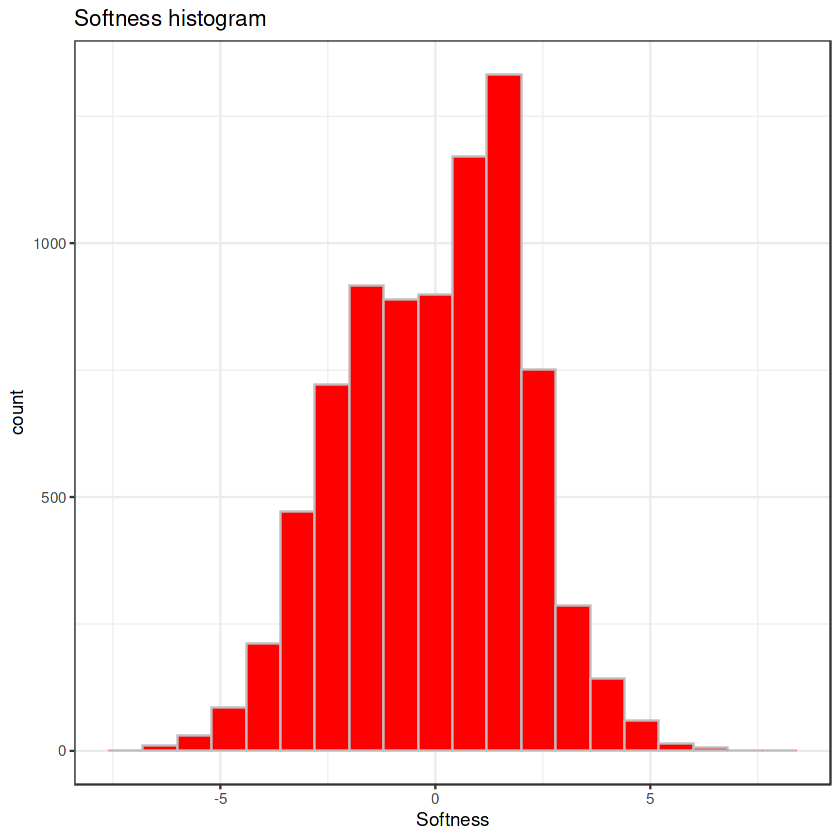

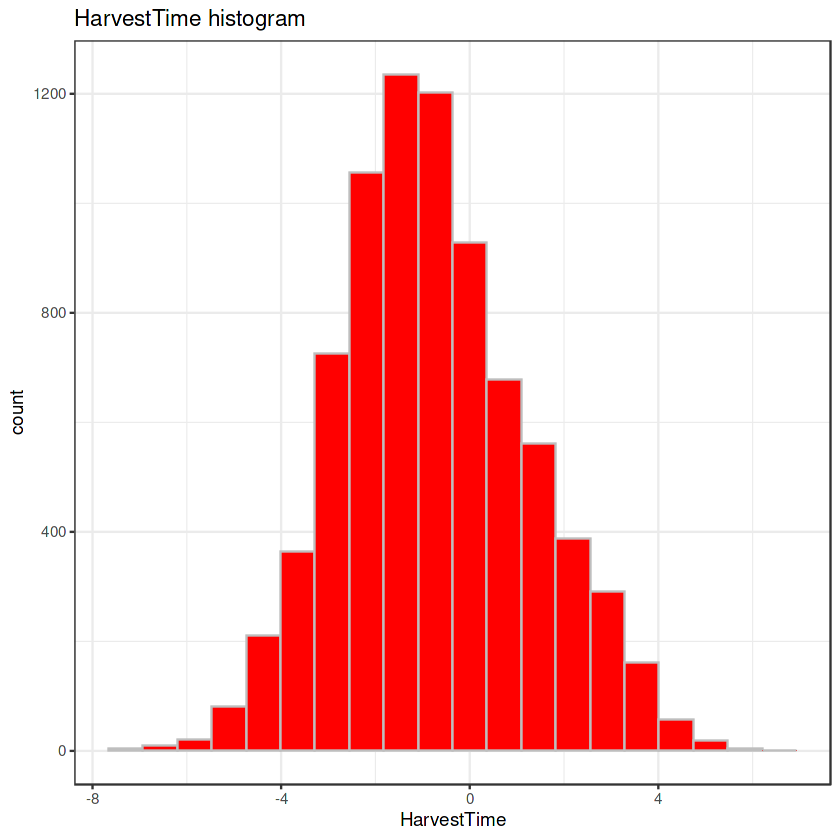

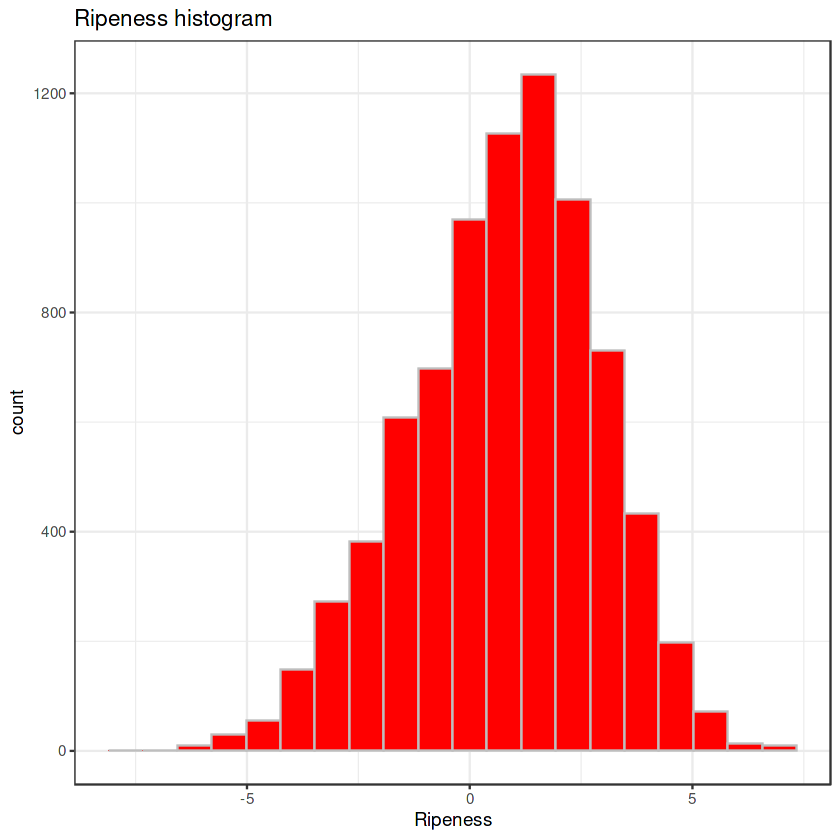

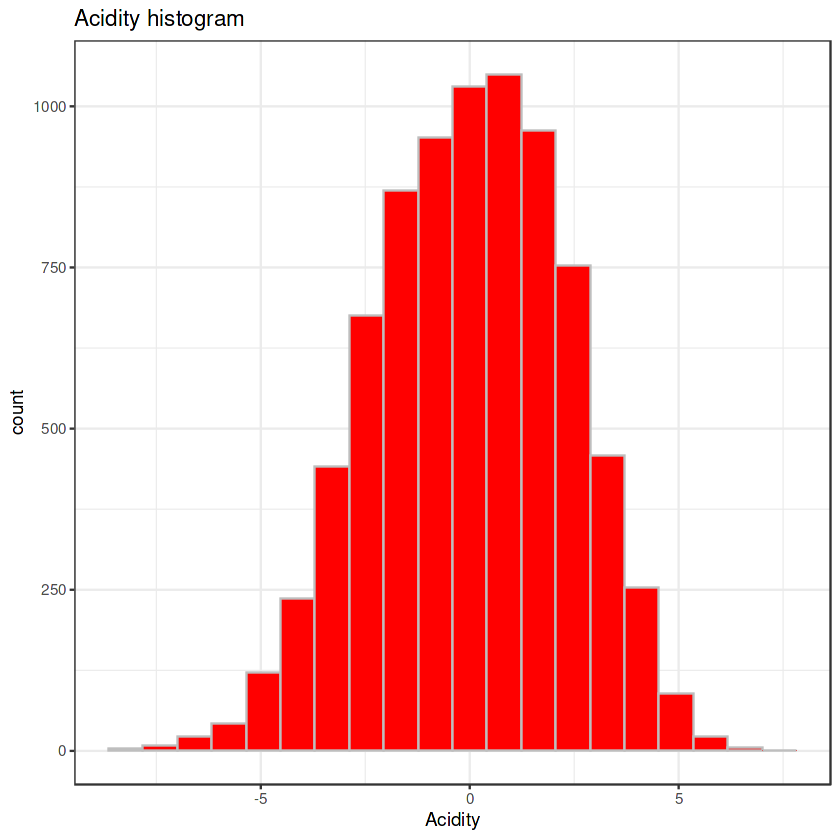

In [371]:
for (i in cols){
    print(ggplot(data_v, aes(x = data_v[,i])) + geom_histogram(bins = 20,col = 'gray', fill = 'red') + 
          xlab(i) + ggtitle(paste0(i,' histogram')) + theme_bw())
}


---------------

**Number of Quality Variables**

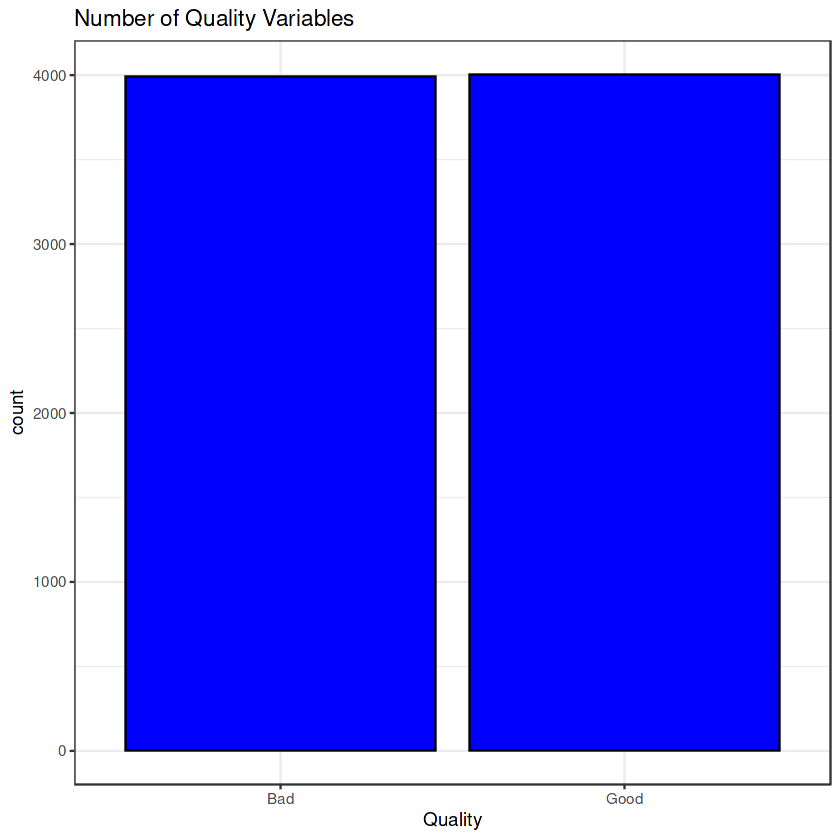

In [372]:
ggplot(data_v, aes(x= Quality)) + geom_bar(fill = 'blue', col = 'black')+
        ggtitle('Number of Quality Variables') +
            theme_bw()

-----------

**Boxplot by Quality**

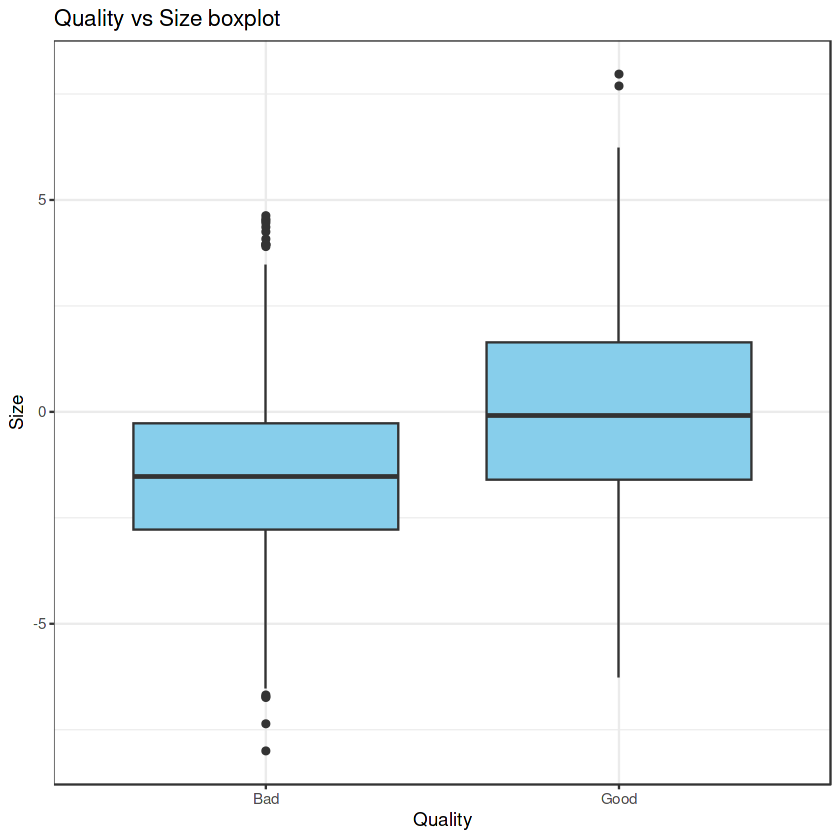

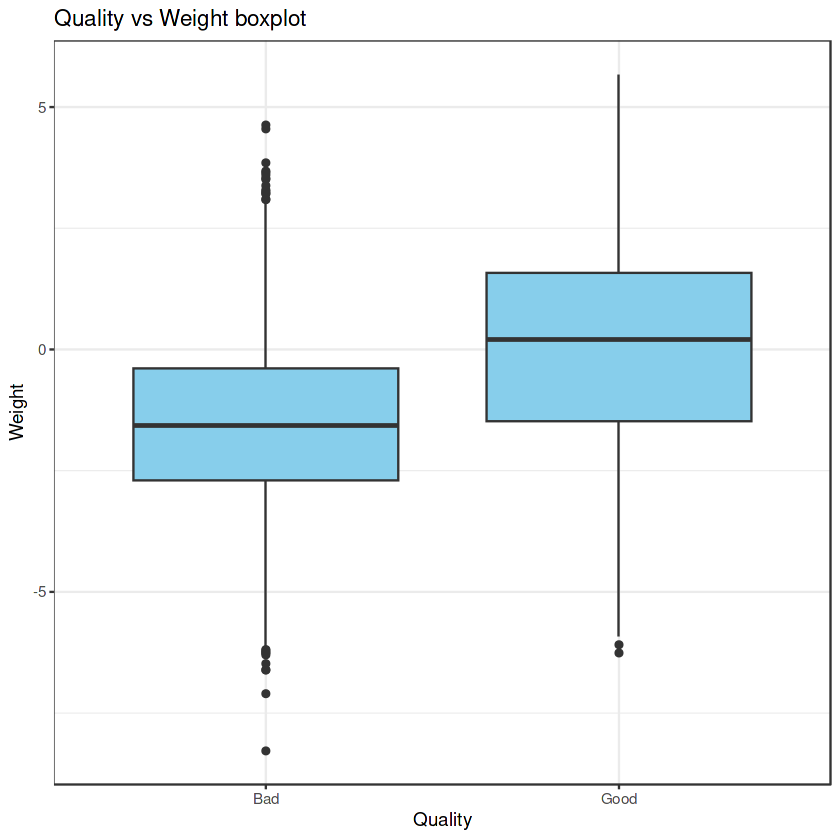

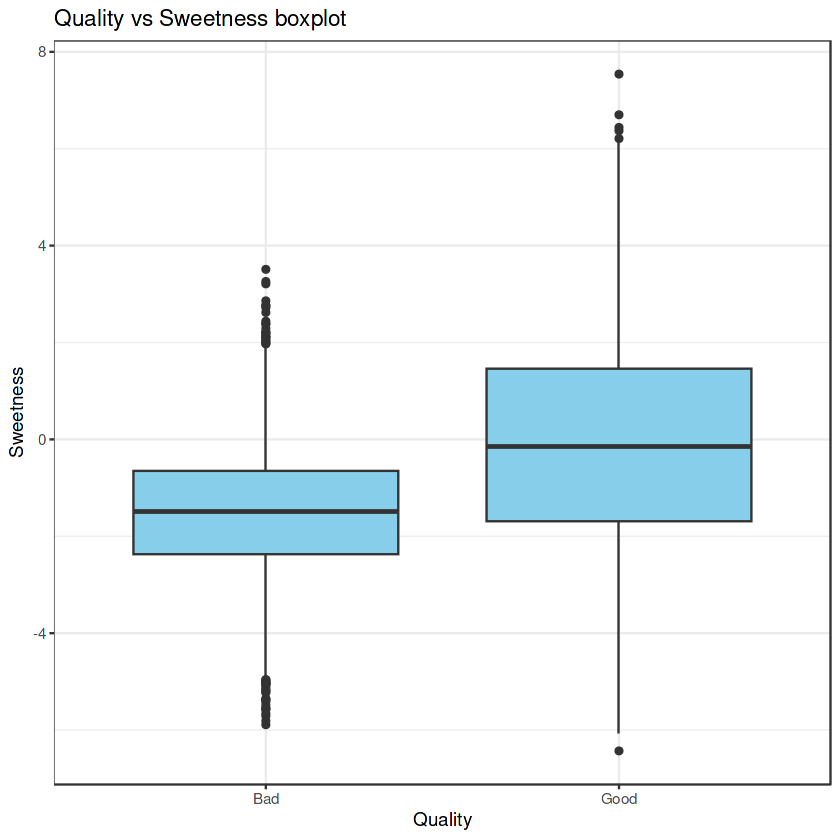

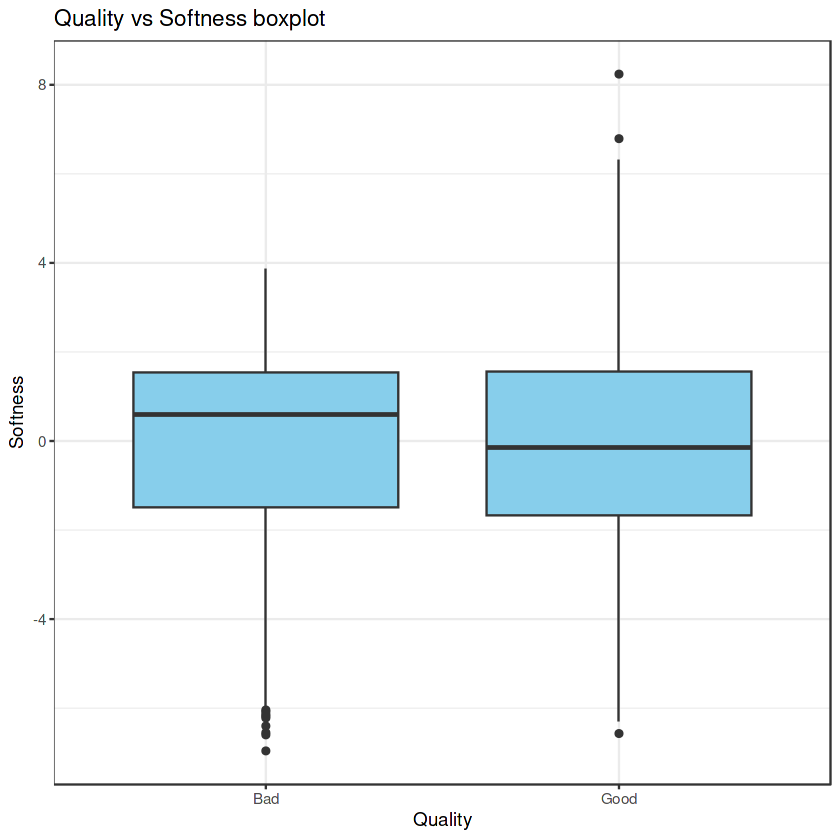

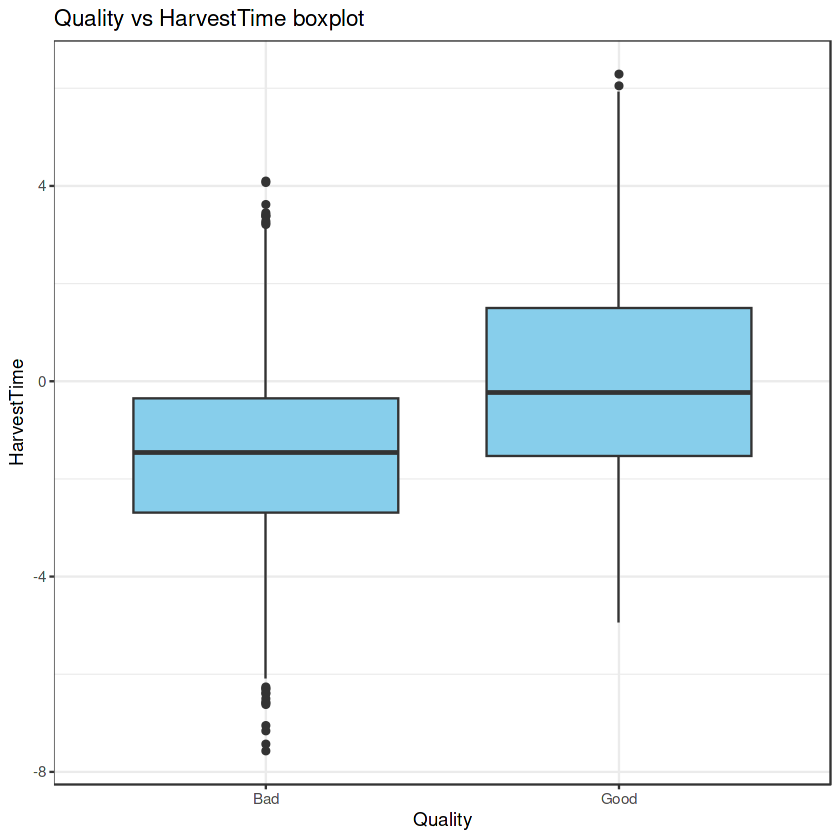

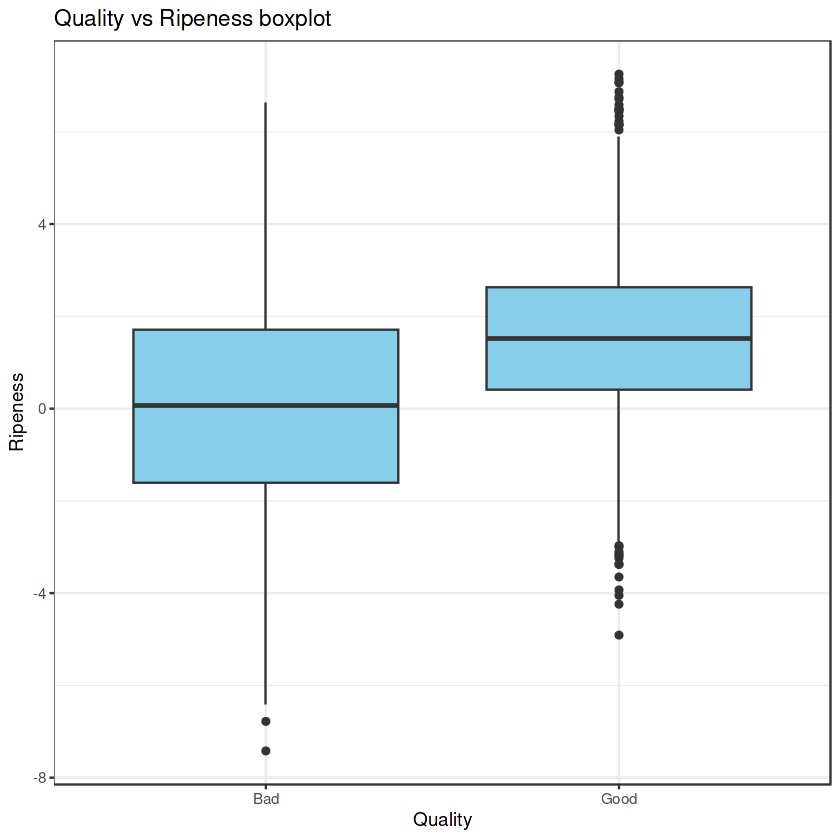

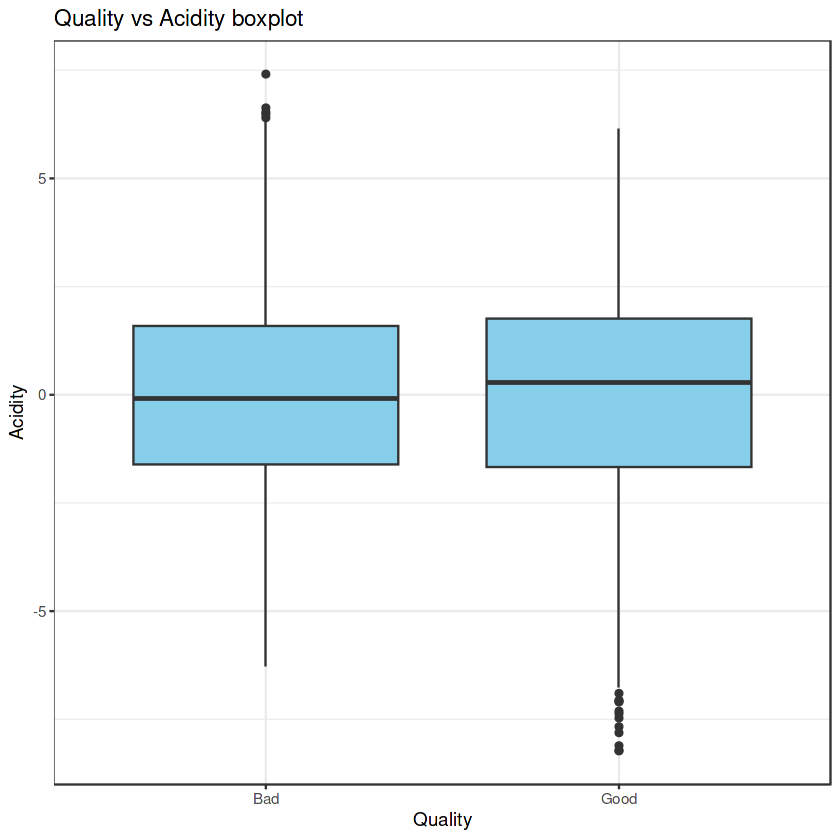

In [373]:
for (i in cols){
    print(ggplot(data_v, aes(x=Quality,y=data[,i])) + geom_boxplot(fill = 'skyblue') + ggtitle(paste0('Quality vs ',i , ' boxplot')) + ylab(i) +
         theme_bw())
}


----------------

**Correlation**

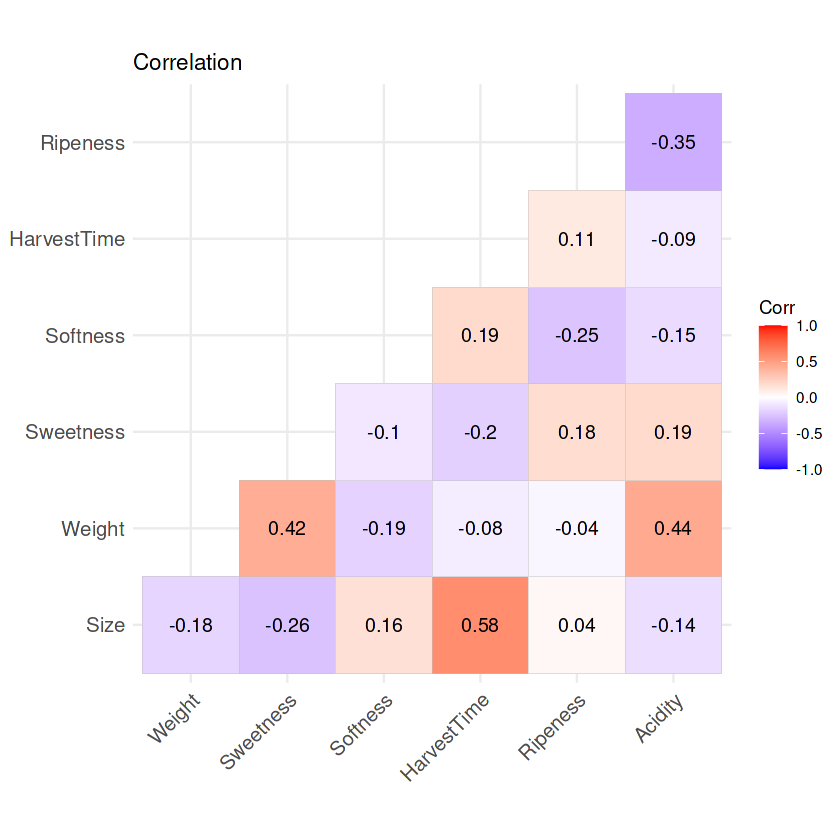

In [374]:
ggcorrplot(cor(data_v[,cols]) , type = "lower", lab=T, title = 'Correlation')

------------

# **4.Modeling**

In [375]:
library(randomForest)
library(class)
library(kknn)
library(e1071)
library(caret)

**LogisticRegression**

In [376]:
idx <- sample(1:nrow(data),nrow(data)*0.75)
train<- data[idx,]
test <- data[-idx,]

In [377]:
md_LR <- glm(Quality ~., data = train , family = "binomial")

In [378]:
summary(md_LR)


Call:
glm(formula = Quality ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4175  -0.3652  -0.0084   0.3225   3.7187  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.71897    0.07588 -22.654  < 2e-16 ***
Size        -0.70232    0.03015 -23.295  < 2e-16 ***
Weight      -0.99979    0.03683 -27.149  < 2e-16 ***
Sweetness   -0.83004    0.03357 -24.729  < 2e-16 ***
Softness    -0.09349    0.02326  -4.020 5.83e-05 ***
HarvestTime -0.57723    0.03166 -18.233  < 2e-16 ***
Ripeness    -0.65805    0.03044 -21.616  < 2e-16 ***
Acidity      0.10873    0.02320   4.686 2.79e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8317.7  on 5999  degrees of freedom
Residual deviance: 3324.6  on 5992  degrees of freedom
AIC: 3340.6

Number of Fisher Scoring iterations: 6


**Select Variables**

In [379]:
step(md_LR,direction = "backward")

Start:  AIC=3340.56
Quality ~ Size + Weight + Sweetness + Softness + HarvestTime + 
    Ripeness + Acidity

              Df Deviance    AIC
<none>             3324.6 3340.6
- Softness     1   3341.0 3355.0
- Acidity      1   3346.6 3360.6
- HarvestTime  1   3726.7 3740.7
- Ripeness     1   3951.6 3965.6
- Size         1   4055.5 4069.5
- Sweetness    1   4219.9 4233.9
- Weight       1   4480.4 4494.4



Call:  glm(formula = Quality ~ Size + Weight + Sweetness + Softness + 
    HarvestTime + Ripeness + Acidity, family = "binomial", data = train)

Coefficients:
(Intercept)         Size       Weight    Sweetness     Softness  HarvestTime  
   -1.71897     -0.70232     -0.99979     -0.83004     -0.09349     -0.57723  
   Ripeness      Acidity  
   -0.65805      0.10873  

Degrees of Freedom: 5999 Total (i.e. Null);  5992 Residual
Null Deviance:	    8318 
Residual Deviance: 3325 	AIC: 3341

In [380]:
pred_glm <- round(predict(md_LR, test ,type = "response"))

In [381]:
pred_glm <- as.factor(pred_glm +1)

In [382]:
a <- confusionMatrix(pred_glm,test$Quality)
a

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 867 142
         2 134 857
                                          
               Accuracy : 0.862           
                 95% CI : (0.8461, 0.8768)
    No Information Rate : 0.5005          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.724           
                                          
 Mcnemar's Test P-Value : 0.6735          
                                          
            Sensitivity : 0.8661          
            Specificity : 0.8579          
         Pos Pred Value : 0.8593          
         Neg Pred Value : 0.8648          
             Prevalence : 0.5005          
         Detection Rate : 0.4335          
   Detection Prevalence : 0.5045          
      Balanced Accuracy : 0.8620          
                                          
       'Positive' Class : 1               
                              

In [383]:
a$overall[1]

Accuracy 
   0.862

----

**RandomForest**

In [384]:
md_RF <-  randomForest(Quality~., data = train, ntree=300)

In [385]:
pred_rf <- predict(md_RF,test)

In [386]:
b <-confusionMatrix(pred_rf, reference = test$Quality)
b

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 959  30
         2  42 969
                                          
               Accuracy : 0.964           
                 95% CI : (0.9549, 0.9717)
    No Information Rate : 0.5005          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.928           
                                          
 Mcnemar's Test P-Value : 0.1949          
                                          
            Sensitivity : 0.9580          
            Specificity : 0.9700          
         Pos Pred Value : 0.9697          
         Neg Pred Value : 0.9585          
             Prevalence : 0.5005          
         Detection Rate : 0.4795          
   Detection Prevalence : 0.4945          
      Balanced Accuracy : 0.9640          
                                          
       'Positive' Class : 1               
                              

In [387]:
b$overall[1]

Accuracy 
   0.964

----------------

**SVM**

In [388]:
md_svm <- svm(Quality~., data = train, type="C-classification",kernel = "radial", cost=10 , gamma=0.1)

In [389]:
pred_svm <- predict(md_svm,test)

In [390]:
c<-confusionMatrix(pred_svm, test$Quality)
c

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 977  24
         2  24 975
                                          
               Accuracy : 0.976           
                 95% CI : (0.9683, 0.9823)
    No Information Rate : 0.5005          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.952           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9760          
            Specificity : 0.9760          
         Pos Pred Value : 0.9760          
         Neg Pred Value : 0.9760          
             Prevalence : 0.5005          
         Detection Rate : 0.4885          
   Detection Prevalence : 0.5005          
      Balanced Accuracy : 0.9760          
                                          
       'Positive' Class : 1               
                              

In [391]:
c$overall[1]

Accuracy 
   0.976

-----------------

**KNN**

In [392]:
md_knn <- knn(train[,-8],test[,-8],train$Quality,k=5)

In [393]:
d <- confusionMatrix(md_knn, test$Quality)
d

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 969  21
         2  32 978
                                          
               Accuracy : 0.9735          
                 95% CI : (0.9655, 0.9801)
    No Information Rate : 0.5005          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.947           
                                          
 Mcnemar's Test P-Value : 0.1696          
                                          
            Sensitivity : 0.9680          
            Specificity : 0.9790          
         Pos Pred Value : 0.9788          
         Neg Pred Value : 0.9683          
             Prevalence : 0.5005          
         Detection Rate : 0.4845          
   Detection Prevalence : 0.4950          
      Balanced Accuracy : 0.9735          
                                          
       'Positive' Class : 1               
                              

In [394]:
d$overall[1]

Accuracy 
  0.9735

---------------

# **5.Evaluation**

**The SVM with the highest accuracy is the best model.**

-------------------

**Thankyou. Please leave your advice in the comments**